## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Question 1

Simulate a Discrete Probability Distribution
a. Write Python code to simulate a discrete random variable representing a die
roll (numbers 1 through 6).
b. Generate 10,000 random rolls of a fair die using NumPy.
c. Plot the probability mass function (PMF) using a bar plot.

Rolling a dice once: 
Answer = 2
10000 random rolls: 
Answer = [4 4 1 ... 1 3 6]
Plotting the probability mass function: 
            probability
dice_value             
1                0.1624
2                0.1703
3                0.1702
4                0.1629
5                0.1683
6                0.1659


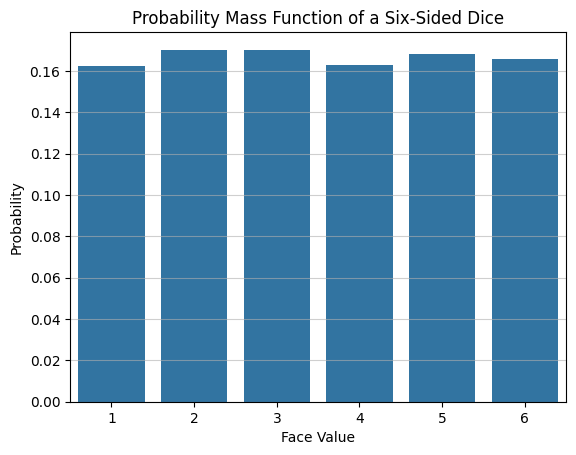

In [11]:
def roll_dice():
    return np.random.randint(1, 7)

def ten_thoushand_roll():
    return np.random.randint(1,7,10000)

def plot_pmf():
    rolls = ten_thoushand_roll()
    df=pd.DataFrame(data=rolls,columns="dice_value".split())
    #df=df.groupby('dice_value').size() 
    count_df=df.value_counts().sort_index().rename_axis("dice_value").to_frame("probability")
    count_df["probability"]=count_df["probability"]/10000
    print(count_df)
    sns.barplot(x="dice_value", y="probability", data=count_df)
    plt.title('Probability Mass Function of a Six-Sided Dice')
    plt.grid(axis="y",alpha=0.6)
    plt.xlabel('Face Value')
    plt.ylabel('Probability')
    plt.show()

def solve_1():
    print("Rolling a dice once: ")
    print(f"Answer = {roll_dice()}")
    print("10000 random rolls: ")
    print(f"Answer = {ten_thoushand_roll()}")
    print("Plotting the probability mass function: ")
    plot_pmf()

solve_1()

## Question 2

Suppose that an examination consists of six true and false questions and assume
that a student has no knowledge of the subject matter. The probability that the
student will guess the correct answer to the first question is 30%. Likewise, the
probability of guessing each of the remaining questions correctly is also 30%.
a. What is the probability of getting exactly three correct answers?
b. What is the probability of getting at least two correct answers?
c. What is the probability of getting at most two correct answers?
d. What is the probability of getting less than five correct answers?

In [12]:
def factorial(n):
    factorials = [1] * (n + 1)
    for i in range(2, n + 1):
        factorials[i] = factorials[i - 1] * i
    return factorials

def bionomial_distribution(x,n,p):
    factorials=factorial(n)
    return factorials[n] / (factorials[x] * factorials[n-x]) * (p**x) * ((1-p)**(n-x))

def solve_2():
    p=0.3
    n=6
    print("a. What is the probability of getting exactly three correct answers?")
    answer_a=bionomial_distribution(3,n,p)
    print(f"answer = {answer_a:.6f}")
    print("b. What is the probability of getting at least two correct answers?")
    answer_b=1-(bionomial_distribution(0,n,p)+bionomial_distribution(1,n,p))
    print(f" answer = {answer_b:.6f}")
    print("c. What is the probability of getting at most two correct answers?")
    answer_c=(bionomial_distribution(0,n,p)+bionomial_distribution(1,n,p)+bionomial_distribution(2,n,p))
    print(f"answer = {answer_c:.6f}")
    print("d. What is the probability of getting less than five correct answers?")
    answer_d=1-(bionomial_distribution(5,n,p)+bionomial_distribution(6,n,p))
    print(f"answer = {answer_d:.6f}")
    
solve_2()

a. What is the probability of getting exactly three correct answers?
answer = 0.185220
b. What is the probability of getting at least two correct answers?
 answer = 0.579825
c. What is the probability of getting at most two correct answers?
answer = 0.744310
d. What is the probability of getting less than five correct answers?
answer = 0.989065


## Question 3

In a study of drug-induced anaphylaxis among patients taking rocuronium bromide
as part of their anesthesia, the occurrence of anaphylaxis followed a Poisson
distribution with λ =12 incidents per year in Norway. Find the probability that in the
next year, among patients receiving rocuronium.
a. Exactly three will experience anaphylaxis.
b. At least two will experience anaphylaxis
c. At most two-experience anaphylaxis


In [13]:
def poisson_distribution(lamda,k):
    factorials=factorial(k)
    return (np.exp(-lamda)* (lamda**k))/ factorials[k]

def solve_3():
    lamda=12
    print("a. Exactly three will experience anaphylaxis.")
    answer_a=poisson_distribution(lamda,3)
    print(f"answer = {answer_a:.6f}")
    print("b. At least two will experience anaphylaxis.")
    answer_b=1-(poisson_distribution(lamda,0)+poisson_distribution(lamda,1))
    print(f"answer = {answer_b:.6f}")
    print("c. At most two-experience anaphylaxis.")
    answer_c=poisson_distribution(lamda,0)+poisson_distribution(lamda,1)+poisson_distribution(lamda,2)
    print(f"answer = {answer_c:.6f}")
    
solve_3()

a. Exactly three will experience anaphylaxis.
answer = 0.001770
b. At least two will experience anaphylaxis.
answer = 0.999920
c. At most two-experience anaphylaxis.
answer = 0.000522


## Question 4

Suppose mean height of 500 students is 160 cm and SD is 5 cm. If height follows
normal distribution, then calculate the following:
Note: to get z-score table value you can use: norm.cdf() method. To do so, just
import as – “from scipy.stats import norm”
a. What is the chance of height above 168 cm?
b. What percentage of students will have height above 168 cm?
c. How many of students will have height between 150 cm to 175cm?

In [ ]:
from scipy.stats import norm

def z_score(x,mean,sd):
    return (x-mean)/sd

def solve_4():
    mean_height=160
    sd_height=5
    total_students=500
    print("a. What is the chance of height above 168 cm?")
    z_score_a=z_score(168,mean_height,sd_height)
    probability_height_above_168=1-norm.cdf(z_score_a)
    print(f"answer = {probability_height_above_168:.4f}")
    print("b. What percentage of students will have height above 168 cm? ")
    percent_height_above_168=probability_height_above_168*100
    print(f"answer = {percent_height_above_168:.3f}%")
    print("c. How many of students will have height between 150 cm to 175 cm?")
    z_score_150=z_score(150,mean_height,sd_height)
    z_score_175=z_score(175,mean_height,sd_height)
    students_with_height_between_150_to_175=norm.cdf(z_score_175)-norm.cdf(z_score_150)
    number_of_students_with_height_between_150_to_175=students_with_height_between_150_to_175*total_students
    print(f"answer = {number_of_students_with_height_between_150_to_175:.0f}")

solve_4()

a. What is the chance of height above 168 cm?
answer = 0.0548
b. What percentage of students will have height above 168 cm? 
answer = 5.480%
c. How many of students will have height between 150 cm to 175 cm?
answer = 488


Question 1: 
Rolling a dice once: 
Answer = 5
10000 random rolls: 
Answer = [5 4 4 ... 3 6 3]
Plotting the probability mass function: 
            probability
dice_value             
1                0.1585
2                0.1624
3                0.1700
4                0.1668
5                0.1705
6                0.1718


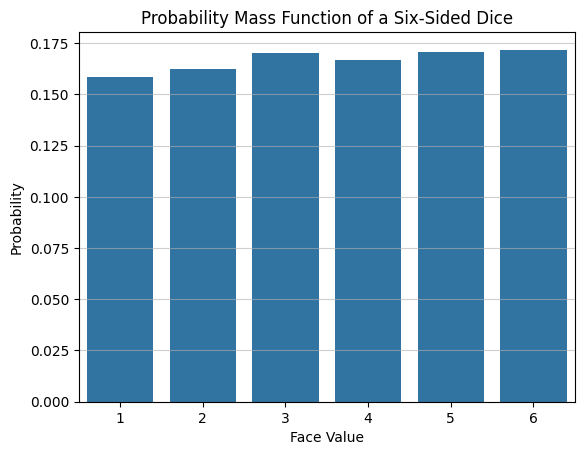


Question 2: 
a. What is the probability of getting exactly three correct answers?
answer = 0.185220
b. What is the probability of getting at least two correct answers?
 answer = 0.579825
c. What is the probability of getting at most two correct answers?
answer = 0.744310
d. What is the probability of getting less than five correct answers?
answer = 0.989065

Question 3: 
a. Exactly three will experience anaphylaxis.
answer = 0.001770
b. At least two will experience anaphylaxis.
answer = 0.999920
c. At most two-experience anaphylaxis.
answer = 0.000522

Question 4: 
a. What is the chance of height above 168 cm?
answer = 0.0548
b. What percentage of students will have height above 168 cm? 
answer = 5.480%
c. How many of students will have height between 150 cm to 175 cm?
answer = 488


In [15]:
if __name__ == "__main__":
    print("Question 1: ")
    solve_1()
    print("\nQuestion 2: ")
    solve_2()
    print("\nQuestion 3: ")
    solve_3()
    print("\nQuestion 4: ")
    solve_4()

# Question 5


## Prepare a document on how to calculate p-value to test hypothesis.

---

## **What is a p-value?**

The **p-value** is a statistical measure that helps us decide whether to reject the null hypothesis ($H_0$). They measure the compatibility of the observed data with the null hypothesis, assuming it is true.


- A **small p-value** ($p < \alpha$) suggests strong evidence against $H_0$.
- A **large p-value** ($p \geq \alpha$) indicates weak evidence against $H_0$.

---

## **Steps to Calculate the p-value**

### **Step 1: State the Hypotheses**
Clearly define:  
- **Null Hypothesis ($H_0$)**: The assumption or claim to test.  
- **Alternative Hypothesis ($H_a$)**: The claim contradicting $H_0$.

Example:  
- $H_0: \mu = \text{population mean}$.  
- $H_a: \mu \neq \text{population mean}$ (two-tailed test).  

---

### **Step 2: Identify the Test and Gather Data**

- Decide whether to use a **z-test** or a **t-test**:
  - Use **z-test** when population standard deviation ($\sigma$) is known or sample size $n \geq 30$.  
  - Use **t-test** when $\sigma$ is unknown and $n < 30$.  

- Gather key values:
  - $\mu$: Population mean.  
  - $\bar{x}$: Sample mean.  
  - $\sigma$ or $s$: Standard deviation.  
  - $n$: Sample size.  
  - $\alpha$: Significance level.

---

### **Step 3: Calculate the Test Statistic**

Compute the z-value or t-value using appropriate formulas:  

1. **z-Test Formula** (for known $\sigma$):  
$$
z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}
$$

2. **t-Test Formula** (for unknown $\sigma$):  
$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

Where:  
- $\bar{x}$: Sample mean.  
- $\mu$: Population mean.  
- $\sigma$: Population standard deviation (if known).  
- $s$: Sample standard deviation (if $\sigma$ unknown).  
- $n$: Sample size.

---

### **Step 4: Determine the Critical Values**

- For a **two-tailed test**, divide $\alpha$ equally between both tails: $\alpha/2$.  
- Use a z-table (or t-table for t-tests) to find the critical value corresponding to $1 - \alpha/2$.  
  - Example: For $\alpha = 0.05$, $1 - \alpha/2 = 0.975$.

---

### **Step 5: Find the p-value**

- **For z-test:**  
  - Use the z-value to find the cumulative probability from a z-table.  
  - For a two-tailed test, multiply the one-tailed p-value by 2.  

- **For t-test:**  
  - Use the degrees of freedom ($df = n - 1$) and the t-value to find the probability from a t-table.  
  - Multiply by 2 for a two-tailed test.  

---

### **Step 6: Compare p-value with $\alpha$**
 
One important part of hypothesis testing is understanding how to determine if there is enough evidence to support your claim. There are two possible outcomes of hypothesis testing:

#### 1. Reject the Null Hypothesis
- **Determine that there is sufficient evidence to suggest that the alternative hypothesis is true.**
  - Condition: $p < \alpha $
  - Condition: $ \text{Test statistic} > \text{critical value} $

#### 2. Fail to Reject the Null Hypothesis
- **Determine that there is not sufficient evidence to suggest the alternative hypothesis is true.**
  - Condition: $ p \geq \alpha $
  - Condition: $ \text{Test statistic} < \text{critical value} $

To illustrate further we can look into this diagram: 
![Decision Rule](Decision_Rule.jpg)

---

### **Step 7: Interpret the Results**
Summarize the outcome in the context of the problem.

**Note:** P-values indicate statistical significance but do not measure clinical significance. A small p-value may arise from large sample sizes even for trivial effects, while larger effects may not reach statistical significance in small samples.

**Note Again:** When it comes to statistics, nothing is certain. Rejecting the null hypothesis does not “prove” our claim to be true, it simply provides evidence that suggests that it could be. Similarly, failing to reject the null does not “prove” that the null is true, the data simply just did not provide enough evidence to suggest the alternative is true.



---

## **Solved Example:**

### **Problem**
The population mean ($\mu$) is 72 with a population standard deviation ($\sigma$) of 4. A sample of 36 observations yields a sample mean ($\bar{x}$) of 74. At a 95% confidence level ($\alpha = 0.05$), is there enough evidence to support the null hypothesis ($H_0: \mu = 72$)?

---

### **Solution**

#### **Step 1: State the Hypotheses**  
- Null Hypothesis ($H_0$): $\mu = 72$.  
- Alternative Hypothesis ($H_a$): $\mu \neq 72$ (two-tailed test).  

---

#### **Step 2: Gather Data**  
- Population mean ($\mu = 72$).  
- Population standard deviation ($\sigma = 4$).  
- Sample mean ($\bar{x} = 74$).  
- Sample size ($n = 36$).  
- Significance level ($\alpha = 0.05$).  

---

#### **Step 3: Calculate the Test Statistic**  
The z-value is calculated as:  
$$
z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}
$$  
Substituting the values:  
$$
z = \frac{74 - 72}{4 / \sqrt{36}} = \frac{2}{4 / 6} = \frac{2}{0.6667} \approx 3.00
$$

---

#### **Step 4: Determine the Critical Values**  
For $\alpha = 0.05$ (two-tailed):  
- Divide $\alpha$ equally: $\alpha/2 = 0.025$.  
- Find the z-value corresponding to $1 - \alpha/2 = 0.975$ from the z-table:  
$$
z_{critical} = \pm 1.96
$$  
The critical region lies outside $[-1.96, 1.96]$.

---

#### **Step 5: Find the p-value**  
From the z-table:  
- Cumulative probability for $z = 3.00$: $P(z \leq 3.00) = 0.9987$.  
- One-tailed p-value:  
$$
p_{one-tail} = 1 - 0.9987 = 0.0013
$$  
- Two-tailed p-value:  
$$
p_{two-tail} = 2 \times 0.0013 = 0.0026
$$

---

#### **Step 6: Compare p-value with $\alpha$**  
- $p = 0.0026$, which is less than $\alpha = 0.05$.  
Thus, we reject the null hypothesis.

---

#### **Step 7: Interpret the Results**  
At a 95% confidence level, the sample mean of 74 provides strong evidence to reject the null hypothesis. The population mean is not 72.
